# Scikit Learn Practice

In [31]:
from sklearn.datasets import fetch_california_housing # importing a housing data-set.
from sklearn.neighbors import KNeighborsRegressor # Importing our KNN model.
from sklearn.preprocessing import StandardScaler # To normalize numeric features, so that mean 0, std = 1.
from sklearn.pipeline import Pipeline # Lets you chain multiple preprocessing steps + models into a single machine-learning workflow.
from sklearn.model_selection import GridSearchCV # For hyperparameter tuning.
import matplotlib.pyplot as plt # Importing matplotlib to plot graphs.
import pandas as pd # importing pandas

In [39]:
X, y = fetch_california_housing(return_X_y=True)  # X (Feature Matrix/Observed Data): This represents the input data used to train the model. Y (Target Variable/Labels): This represents the output or ground truth that the model aims to predict.
df = fetch_california_housing(as_frame=True).frame # To display the dataset as a dataframe, set as_frame to True and then .frame
print(df.head()) # The data set.

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  MedHouseVal
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23        4.526
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22        3.585
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24        3.521
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25        3.413
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25        3.422


In [ ]:
# We establish a pipeline, we standardize using the scalar, then call the model.
pipe = Pipeline([
    ('scale', StandardScaler()), #
    ('model', KNeighborsRegressor(n_neighbors=10))
])

# pipe.get_params() # With this we get to see all the parameters that we can tweak.

In [41]:
mod = GridSearchCV(estimator=pipe,
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             cv=3) # We are performing hyperparameter tuning on a KNN model inside a pipeline, using 3-fold cross-validation.
# We are passing down a pipeline, not just a model.
# So GridSearchCV will:
# scale the data (inside pipeline)
# train KNN with different parameters
# choose the best-performing model

# We are telling GridSearchCV to try KNN with k = 1,2,3,....
# cv = 3, so:
# For each value of k (1–10)
# The model is trained on 2/3 of the data
# Tested on the remaining 1/3
# Repeated 3 times with different splits
# Performance is averaged
# Total models trained: 10 values × 3 folds = 30 models

# We are using GridSearchCV to automatically find the best K value (1–10) for a KNN classifier inside a pipeline.

In [42]:
mod.fit(X, y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009428,0.000034,0.144532,0.014639,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.009037,0.000181,0.159828,0.014102,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.009014,0.000070,0.170204,0.012434,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.009176,0.000351,0.182491,0.013387,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.008906,0.000141,0.190339,0.014533,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.009391,0.000079,0.193625,0.013423,6,{'model__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.008939,0.000115,0.197487,0.014975,7,{'model__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.009058,0.000194,0.203349,0.014468,8,{'model__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.009053,0.000216,0.208436,0.014808,9,{'model__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.008854,0.000323,0.211370,0.014787,10,{'model__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1


In [ ]:
# mod.best_params_ # best k

# mod.best_score_ # best accuracy (or scoring metric)

# mod.best_estimator_ # pipeline using the best k

{'model__n_neighbors': 10}

In [ ]:
from sklearn.preprocessing import QuantileTransformer
# QuantileTransformer maps each feature to follow a target distribution by using the quantiles of the data.
#  When to use QuantileTransformer?
# ✔ When data is very skewed
# ✔ When linear models fail due to poor distribution
# ✔ When normality is required (Gaussian)
# ✔ When outliers distort scaling
# ✔ When MinMaxScaler or StandardScaler don't work well

#  When NOT to use it
# ✘ Not good for small datasets
# ✘ Not good when preserving distances is important (e.g., KNN sometimes)
# ✘ Can distort meaning of features too much

from sklearn.preprocessing import PolynomialFeatures
# creates new features by raising existing features to higher powers and generating interaction terms.
# It's used to allow linear models (like Linear Regression) to learn non-linear patterns.
# When to use it?
# ✔ When data shows a non-linear trend
# ✔ When linear regression underfits
# ✔ When you need interactions between features
# ✔ When you want a more flexible model but still explainable

from sklearn.preprocessing import OneHotEncoder
# convert categorical (text or label) features into binary (0/1) columns so that machine-learning models can use them.
# It is the standard way to handle categorical variables.

# Splitting Data Example

In [ ]:
# SPLITTING DATA EXAMPLE
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [47]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 20% Testing, 80% Training.
# X_train	Features used to train the model
# X_test	Features used to test the model
# y_train	Labels/target for the training set
# y_test	Labels/target for the test set

# Classification Example

In [105]:
# CLASSIFICATION EXAMPLE
from sklearn.datasets import load_breast_cancer

In [107]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train) # Shortcut that combines fit() and transform() in one step.
                                               # calculates mean and standard deviation of each feature, uses the computed statistics to scale each feature
X_test_scaled = scalar.transform(X_test)
# do NOT use fit_transform on test data, otherwise you would “leak” information from the test set into your model.
# Uses the statistics computed from the training set, then scales the test data without refitting.
# All features are on the same scale as the training data
# Classification targets (y) should never be scaled

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# clf = KNeighborsClassifier()
clf = LogisticRegression()
# clf = DecisionTreeClassifier()
# clf =  RandomForestClassifier()

clf.fit(X_train_scaled, y_train) #Fitting the model with the training data.

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [109]:
clf.score(X_test_scaled, y_test) # The accuracy we got, after providing the testing data.

0.9824561403508771

In [110]:
single_instance = X_test_scaled[0] # Checking a prediction by taking a single instance
clf.predict([single_instance]) #predict
# clf.predict_proba([single_instance]) # also gives a probability

array([0])

In [111]:
y_test[0] # We see if it matches the prediction or na

np.int64(0)

## Metrics

In [112]:
# Continuing from above -
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred) # same as the score func we used before.

0.9824561403508771

In [114]:
precision_score(y_test, y_pred)

0.9861111111111112

In [115]:
recall_score(y_test, y_pred)

0.9861111111111112

In [116]:
f1_score(y_test, y_pred)

0.9861111111111112

# Regression Example

In [117]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [118]:
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train) 
X_test_scaled = scalar.transform(X_test)

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# reg = LinearRegression()
reg = RandomForestRegressor()

reg.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [120]:
reg.score(X_test_scaled, y_test) # R^2 score. R² ranges from −∞ to 1.0. Higher score is better.

0.8017981650841799

In [121]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

y_pred = reg.predict(X_test_scaled)

In [122]:
r2_score(y_test, y_pred)

0.8017981650841799

In [ ]:
mean_absolute_error(y_test, y_pred)  # Smaller average absolute errors → predictions closer to actual

0.3287118264534885

In [ ]:
mean_squared_error(y_test, y_pred) # Sensitive to outliers. Smaller average squared errors → fewer and smaller big mistakes

0.25371175398570295

In [ ]:
root_mean_squared_error(y_test, y_pred) # Smaller root mean squared error → typical prediction error is smaller

0.5036980782033051

# Clustering Example

In [85]:
from sklearn.datasets import make_blobs # utility function to generate synthetic datasets for clustering
from sklearn.cluster import KMeans  # This imports the K-Means clustering algorithm
from sklearn.preprocessing import StandardScaler

In [86]:
# Generates 5,000 data points, Data will be clustered around 5 centers (5 true clusters
# random_state=10 Ensures the dataset is reproducible
# Why _ is ignored
# make_blobs also returns y (the true labels of clusters)
# In unsupervised learning, you often don’t use the true labels (because clustering is “unsupervised”)
# That’s why _ is used — a Python convention for “ignore this value”

X, _ = make_blobs(n_samples=5000, centers=5, random_state=10) 
X

array([[  6.17306585, -10.25446247],
       [ -8.13981972,   4.45135687],
       [  2.71307241,   4.32686739],
       ...,
       [ -6.91896111,   4.29323728],
       [ -3.95595105,   4.23150467],
       [  0.91461712,  -7.45569288]], shape=(5000, 2))

In [87]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

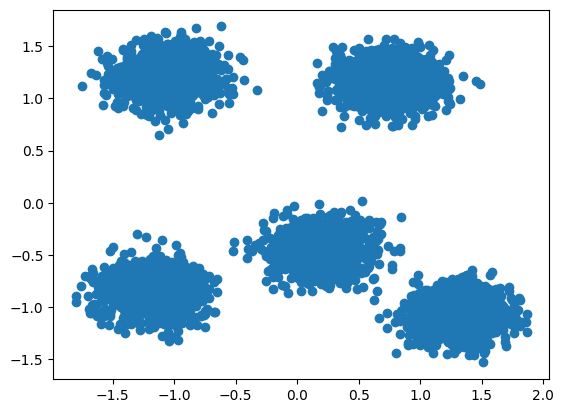

In [88]:
import matplotlib.pyplot as plt
plt.scatter(X_scaled[:, 0], X_scaled[:, 1]) 

# X_scaled[:, 0]	All rows (:) of the first column (0) → x-coordinates
# X_scaled[:, 1]	All rows (:) of the second column (1) → y-coordinates
# The colon : → “take all rows”
# 0 or 1 → choose the first or second feature (dimension)


In [89]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


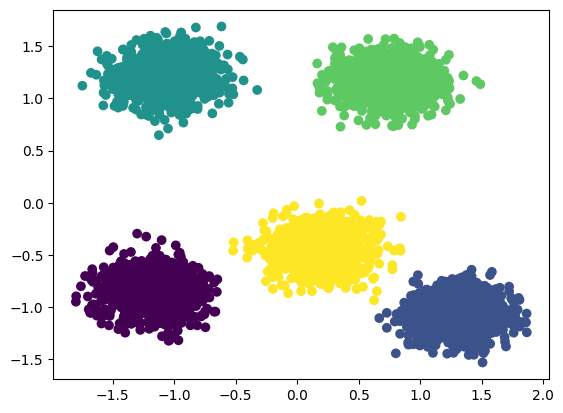

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_)  # kmeans.labels_ predicted cluster labels

# Principal Component Analysis (PCA) Example

In [91]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X, y = fetch_openml('mnist_784', return_X_y=True) #784 columns data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [103]:
pca = PCA(n_components=30)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [99]:
X_train.shape

(56000, 784)

In [100]:
X_train_reduced.shape # Now 10 columns

(56000, 20)

In [101]:
clf = LogisticRegression(max_iter=100)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9217857142857143


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
clf = LogisticRegression(max_iter=100)
clf.fit(X_train_reduced, y_train)
print(clf.score(X_test_reduced, y_test)) # Lower accuracy then 784 columns but still not too low. We can find a good balance this way.

0.8931428571428571


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Cross validation

In [126]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [127]:
X, y = load_breast_cancer(return_X_y=True)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [133]:
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier()
scores = cross_val_score(clf, X_scaled, y, cv=5, scoring='precision')

In [134]:
scores

array([0.97183099, 0.94594595, 0.97297297, 0.93506494, 0.98550725])

# Hyperparameter Tuning Example

In [137]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [138]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Variable containing all the parameters to tune.
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(n_jobs=1) #Use all cpu cores
grid = GridSearchCV(clf, param_grid, cv=3)

In [140]:
grid.fit(X_train, y_train)

,estimator,RandomForestC...fier(n_jobs=1)
,param_grid,"{'max_depth': [None, 5, ...], 'min_samples_split': [2, 5], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [141]:
grid.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

In [143]:
best_clf = grid.best_estimator_
best_clf

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [144]:
best_clf.score(X_test, y_test)

0.972027972027972

# Pipelines

In [145]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.pipeline import Pipeline # We can incorporate everything into a standard pipeline like this.
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('forest', RandomForestClassifier())
])
pipe.fit(X_train, y_train)

,steps,"[('scale', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,10
,copy,True
,whiten,False
,svd_solver,'auto'


In [147]:
pipe.score(X_test, y_test)

0.8951048951048951